In [1]:
NEI <- readRDS("summarySCC_PM25.rds")
SCC <- readRDS("Source_Classification_Code.rds")

In [2]:
NEI

fips  SCC        Pollutant Emissions   type     year
4        09001 10100401   PM25-PRI   15.714     POINT    1999
8        09001 10100404   PM25-PRI  234.178     POINT    1999
12       09001 10100501   PM25-PRI    0.128     POINT    1999
16       09001 10200401   PM25-PRI    2.036     POINT    1999
20       09001 10200504   PM25-PRI    0.388     POINT    1999
24       09001 10200602   PM25-PRI    1.490     POINT    1999
28       09001 10200603   PM25-PRI    0.200     POINT    1999
32       09001 10300401   PM25-PRI    0.081     POINT    1999
36       09001 10300501   PM25-PRI    0.184     POINT    1999
40       09001 10300504   PM25-PRI    0.273     POINT    1999
44       09001 10300602   PM25-PRI    0.330     POINT    1999
48       09001 10300603   PM25-PRI    0.070     POINT    1999
52       09001 20100102   PM25-PRI    2.618     POINT    1999
56       09001 20100201   PM25-PRI   32.607     POINT    1999
60       09001 20100901   PM25-PRI    2.908     POINT    1999
64       09001 20200102   PM25-PRI    0.075     POINT    1999
68       09001 20200902   PM25-PRI    0.076     POINT    1999
72       09001 20300101   PM25-PRI    0.185     POINT    1999
76       09001 20300102   PM25-PRI    2.722     POINT    1999
80       09001 30203299   PM25-PRI    0.327     POINT    1999
83       09001 30502001   PM25-PRI    0.003     POINT    1999
95       09001 40200101   PM25-PRI    1.100     POINT    1999
98       09001 40200401   PM25-PRI    0.010     POINT    1999
119      09001 50100101   PM25-PRI  128.392     POINT    1999
125      09001 2102004000 PM25-PRI    3.634     NONPOINT 1999
129      09001 2102006000 PM25-PRI   28.460     NONPOINT 1999
133      09001 2102007000 PM25-PRI    9.695     NONPOINT 1999
139      09001 2103004000 PM25-PRI   53.112     NONPOINT 1999
149      09001 2104001000 PM25-PRI    1.134     NONPOINT 1999
153      09001 2104004000 PM25-PRI  144.307     NONPOINT 1999
...      ...   ...        ...       ...         ...      ... 
75050931 38013 2265005055 PM25-PRI  7.36602e-03 NON-ROAD 2008
75050941 41037 2260001010 PM25-PRI  5.17094e-01 NON-ROAD 2008
75050951 16015 2265002021 PM25-PRI  4.79603e-04 NON-ROAD 2008
75050961 38061 2267002045 PM25-PRI  3.41227e-05 NON-ROAD 2008
75050971 38041 2267002072 PM25-PRI  1.24125e-05 NON-ROAD 2008
75050981 16021 2270002036 PM25-PRI  3.04799e-01 NON-ROAD 2008
75050991 46081 2267006030 PM25-PRI  1.03464e-05 NON-ROAD 2008
75051001 53063 2267002057 PM25-PRI  1.24217e-03 NON-ROAD 2008
75051011 49011 2265003030 PM25-PRI  6.81483e-03 NON-ROAD 2008
75051021 46023 2268003020 PM25-PRI  6.30337e-04 NON-ROAD 2008
75051031 49025 2268003040 PM25-PRI  6.04085e-07 NON-ROAD 2008
75051041 49039 2285004015 PM25-PRI  0.00000e+00 NON-ROAD 2008
75051051 08067 2260006015 PM25-PRI  6.54286e-05 NON-ROAD 2008
75051061 46003 2265002081 PM25-PRI  5.15055e-06 NON-ROAD 2008
75051071 49021 2265002078 PM25-PRI  3.32487e-04 NON-ROAD 2008
75051081 30063 2265006025 PM25-PRI  6.03735e-02 NON-ROAD 2008
75051091 38015 2267002015 PM25-PRI  2.92011e-04 NON-ROAD 2008
75051101 16065 2270005055 PM25-PRI  3.69758e-01 NON-ROAD 2008
75051111 32510 2270005045 PM25-PRI  1.22626e-03 NON-ROAD 2008
75051121 38005 2265002081 PM25-PRI  1.68654e-05 NON-ROAD 2008
75051131 53007 2270004066 PM25-PRI  9.69598e-02 NON-ROAD 2008
75051141 30103 2265005010 PM25-PRI  1.21296e-04 NON-ROAD 2008
75051151 56015 2270005025 PM25-PRI  1.01489e-02 NON-ROAD 2008
75051161 32510 2265002054 PM25-PRI  7.48028e-04 NON-ROAD 2008
75051171 56011 2282020005 PM25-PRI  2.85983e-02 NON-ROAD 2008
75051181 53009 2265003020 PM25-PRI  3.15241e-03 NON-ROAD 2008
75051191 41057 2260002006 PM25-PRI  4.68695e-02 NON-ROAD 2008
75051201 38015 2270006005 PM25-PRI  1.01289e+00 NON-ROAD 2008
75051211 46105 2265004075 PM25-PRI  4.86488e-04 NON-ROAD 2008
75051221 53005 2270004076 PM25-PRI  1.62267e-03 NON-ROAD 2008


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


`summarise()` ungrouping output (override with `.groups` argument)



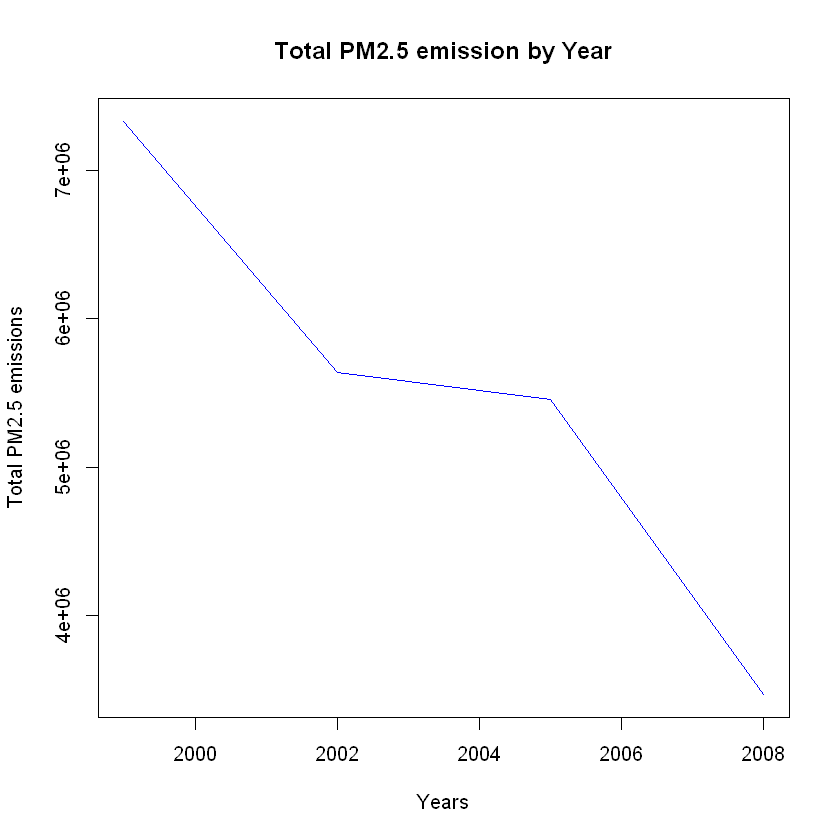

In [3]:
library(dplyr)
total_emi<-NEI  %>% group_by(year) %>% summarise(total=sum(Emissions)) 
with(total_emi,plot(year,total,type="l",col='blue',xlab="Years",
                    ylab="Total PM2.5 emissions",main="Total PM2.5 emission by Year"))

`summarise()` ungrouping output (override with `.groups` argument)



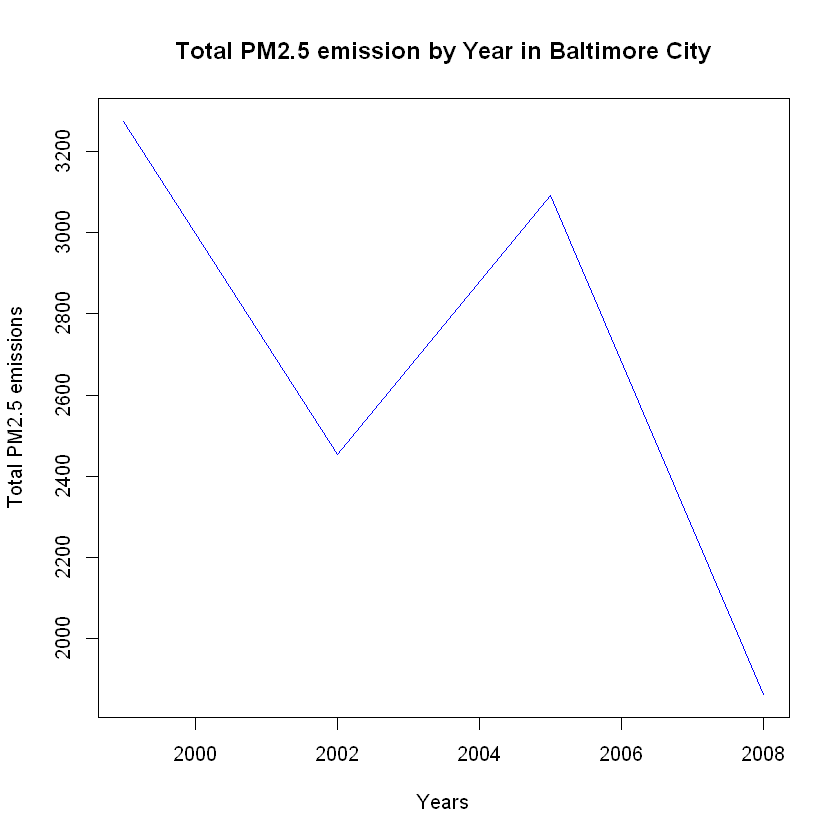

In [4]:
library(dplyr)
total_emi_balti<-NEI %>% filter(fips == "24510") %>% group_by(year) %>% summarise(total=sum(Emissions)) 
with(total_emi_balti,plot(year,total,type="l",col='blue',xlab="Years",
                    ylab="Total PM2.5 emissions",main="Total PM2.5 emission by Year in Baltimore City"))

`summarise()` regrouping output by 'type' (override with `.groups` argument)



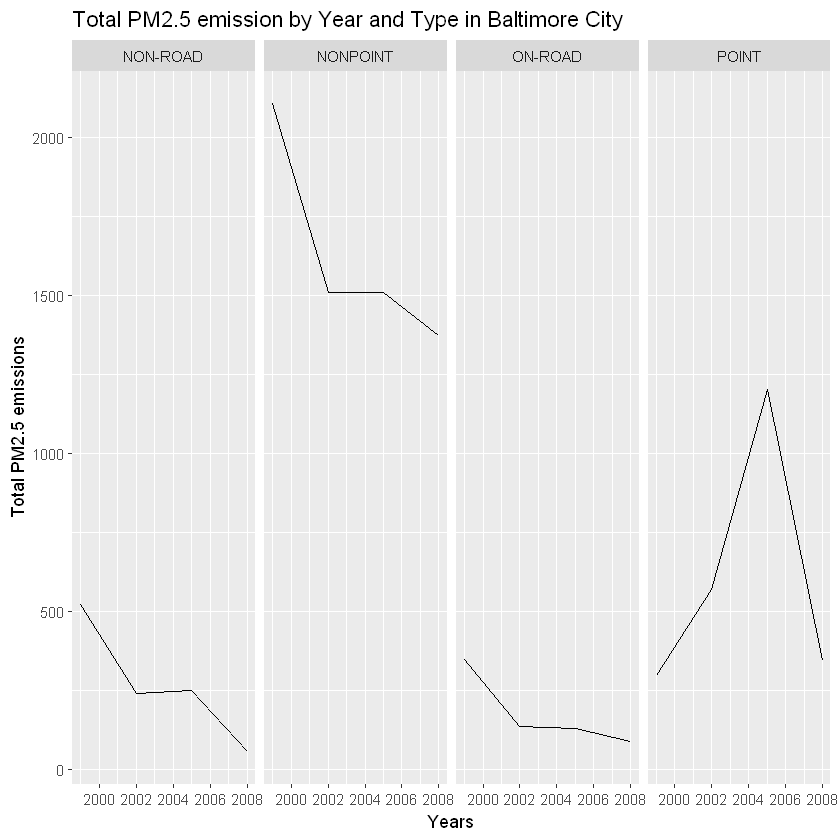

In [5]:
library(dplyr)
library(ggplot2)
total_emi_balti_type<-NEI %>% filter(fips == "24510") %>% group_by(type,year) %>% summarise(total=sum(Emissions)) 
qplot(year,total,data=total_emi_balti_type,facets=.~type,geom="line",xlab="Years",
                    ylab="Total PM2.5 emissions",main="Total PM2.5 emission by Year and Type in Baltimore City")


`summarise()` ungrouping output (override with `.groups` argument)



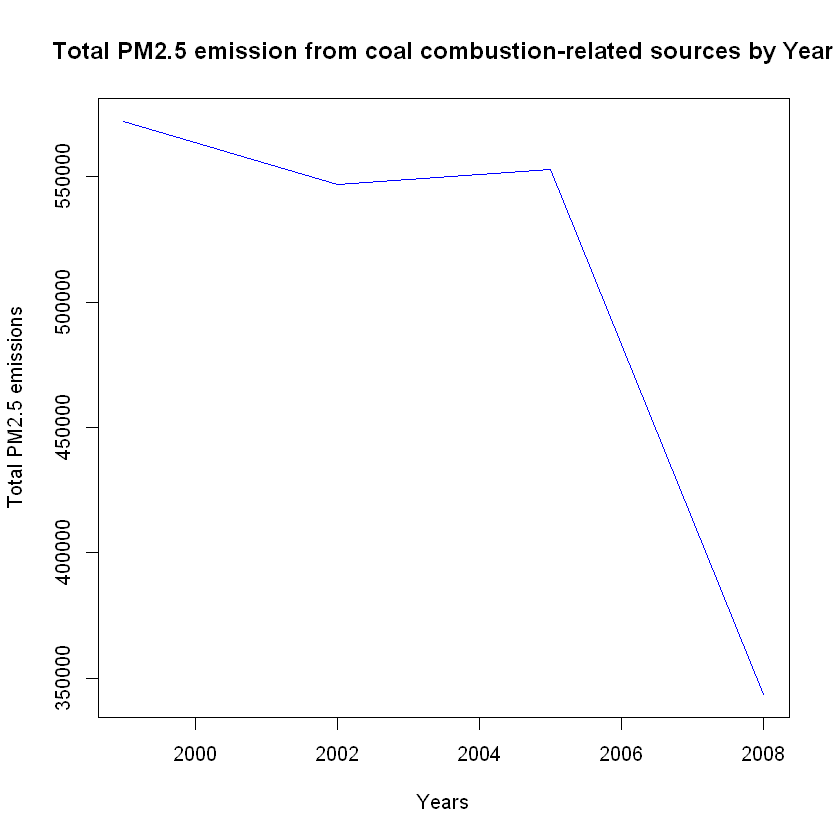

In [6]:
library(dplyr)
total_coal<-SCC %>%filter(grepl("Comb",EI.Sector)) %>%filter(grepl("Coal",EI.Sector)) %>%
merge(NEI,by="SCC") %>% group_by(year) %>% summarise(total=sum(Emissions)) 
with(total_coal,plot(year,total,type="l",col='blue',xlab="Years",
                    ylab="Total PM2.5 emissions",main="Total PM2.5 emission from coal combustion-related sources by Year"))

`summarise()` ungrouping output (override with `.groups` argument)



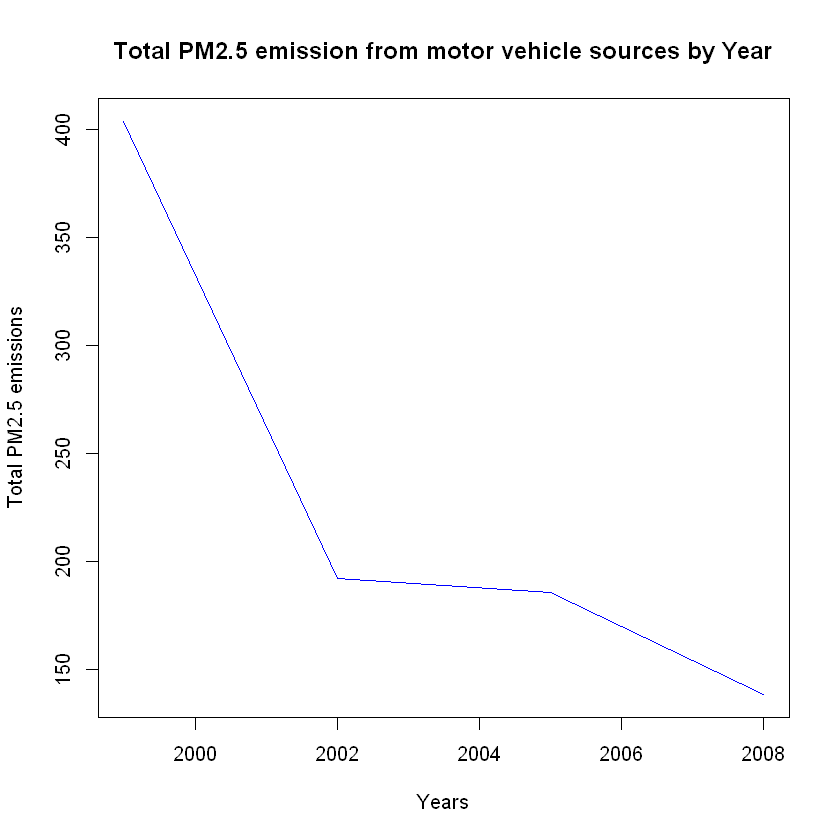

In [7]:
library(dplyr)
motor_balti_total<-SCC %>% filter(SCC.Level.One=="Mobile Sources") %>% filter(grepl("Vehicle",SCC.Level.Two) ) %>%
merge(NEI,by="SCC") %>% filter(fips == "24510") %>% group_by(year) %>% summarise(total=sum(Emissions))
with(motor_balti_total,plot(year,total,type="l",col='blue',xlab="Years",
                    ylab="Total PM2.5 emissions",main="Total PM2.5 emission from motor vehicle sources by Year"))

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



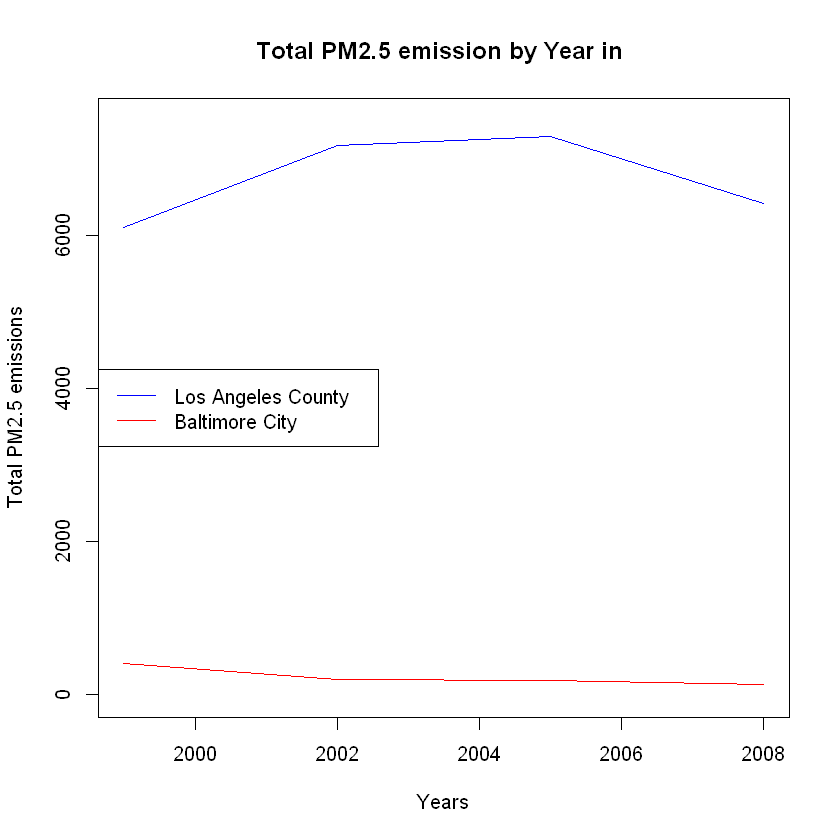

In [8]:
library(dplyr)
motor_balti_total<-SCC %>% filter(SCC.Level.One=="Mobile Sources") %>% filter(grepl("Vehicle",SCC.Level.Two) ) %>%
merge(NEI,by="SCC") %>% filter(fips == "24510") %>% group_by(year) %>% summarise(total=sum(Emissions))
motor_LA_total<-SCC %>% filter(SCC.Level.One=="Mobile Sources") %>% filter(grepl("Vehicle",SCC.Level.Two) ) %>%
merge(NEI,by="SCC") %>% filter(fips == "06037") %>% group_by(year) %>% summarise(total=sum(Emissions))
plot(motor_LA_total$year,motor_LA_total$total,type="l",col='blue',xlab="Years",
                    ylab="Total PM2.5 emissions",main="Total PM2.5 emission by Year in ",ylim=c(0,7500))
    lines(motor_LA_total$year,motor_balti_total$total, col="red")
legend("left",legend=c("Los Angeles County","Baltimore City"),col=c("blue","red"),lty=1)

    